In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Dados de exemplo: quantidade de investidores por profissão e estado
dados = pd.DataFrame({
    'estado': ['SP', 'SP', 'MG', 'MG', 'BA', 'BA'],
    'profissao': ['Engenheiro', 'Médico', 'Engenheiro', 'Médico', 'Engenheiro', 'Médico'],
    'quantidade_investidores': [1000, 1500, 500, 600, 300, 400]
})

# População dos estados
populacao_estado = pd.DataFrame({
    'estado': ['SP', 'MG', 'BA'],
    'populacao': [46000000, 21000000, 15000000]
})

# Merge dos dados com a população
dados = dados.merge(populacao_estado, on='estado')

# Calculando investidores por 100 mil habitantes
dados['investidores_por_100k'] = (dados['quantidade_investidores'] / dados['populacao']) * 100000

# Pivotando os dados para formato de matriz (heatmap)
tabela_percentual = dados.pivot(index='estado', columns='profissao', values='investidores_por_100k')


In [6]:
dados

,estado,profissao,quantidade_investidores,populacao,investidores_por_100k
0,SP,Engenheiro,1000,46000000,2.173913
1,SP,Médico,1500,46000000,3.260870
2,MG,Engenheiro,500,21000000,2.380952
3,MG,Médico,600,21000000,2.857143
4,BA,Engenheiro,300,15000000,2.000000
5,BA,Médico,400,15000000,2.666667


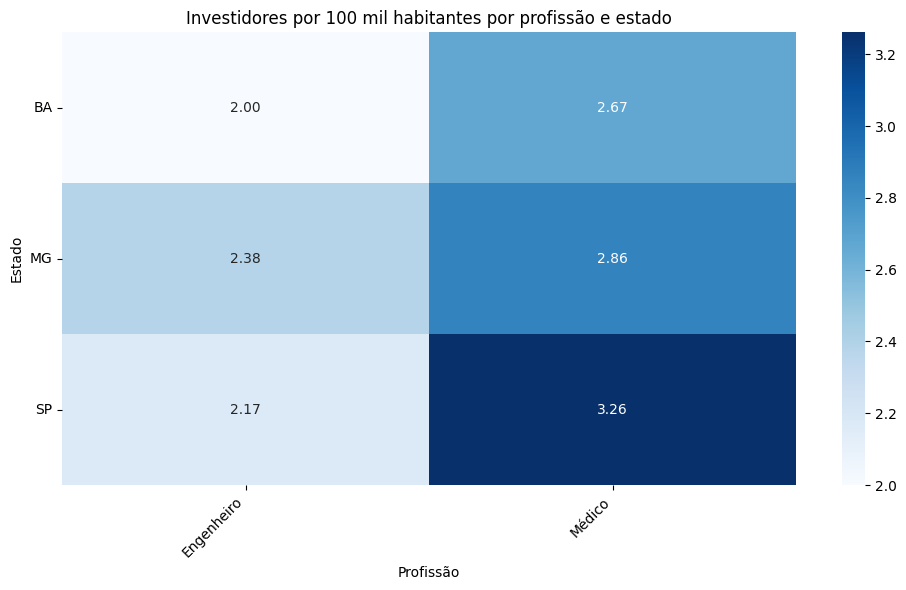

In [5]:
# Plot do heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tabela_percentual, annot=True, fmt=".2f", cmap="Blues")

plt.title('Investidores por 100 mil habitantes por profissão e estado')
plt.xlabel('Profissão')
plt.ylabel('Estado')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout()

# Exibir o gráfico
plt.show()